In [ ]:
# I set the package using (v1.1) pkg> add /Users/rjkyng/Dropbox/Repos/Laplacians.jl
# hopefully that works
# git checkout perf-tbest-dev

In [1]:
using Revise

In [18]:
using Laplacians
using SparseArrays

In [3]:
using Pkg

In [4]:
Pkg.pathof(Laplacians)

"/Users/rjkyng/Dropbox/Repos/Laplacians.jl/src/Laplacians.jl"

maybe switch to Juno?


https://github.com/JunoLab/atom-julia-client/blob/master/manual/workflow.md

https://stackoverflow.com/questions/52910007/creating-and-using-a-custom-module-in-julia

https://stackoverflow.com/questions/30667397/what-is-a-good-workflow-for-developing-julia-modules-with-ipython-jupyter

CURRENT:
https://medium.com/@Jernfrost/my-new-workflow-with-julia-1-0-99711103d97c

In [7]:
pwd()

"/Users/rjkyng/Dropbox/Repos/Laplacians.jl/devel"

In [8]:
@time A = grid2(10,10);

  0.000060 seconds (113 allocations: 50.719 KiB)


In [9]:
s = 1000
n = s*s
@time A = grid2(s,s);

  1.124103 seconds (4.45 k allocations: 419.767 MiB, 38.00% gc time)


In [10]:
s = 1000
n = s*s
@time A = grid2(s,s);

  0.691196 seconds (141 allocations: 419.556 MiB, 45.47% gc time)


In [11]:
s = 2000
n = s*s
@time A = grid2(s,s);

  4.180330 seconds (154 allocations: 1.639 GiB, 26.94% gc time)


In [12]:
Base.summarysize(A)/(2^10)^2 # num. of mega bytes?

274.53629302978516

In [13]:
s = 4000
n = s*s
@time A = grid2(s,s);

 15.392287 seconds (171 allocations: 6.556 GiB, 10.17% gc time)


In [14]:
Base.summarysize(A)/(2^10)^2 # num. of mega bytes?

1098.3888320922852

In [15]:
1098.3888320922852/274.53629302978516

4.000887532830197

# try new grid gen 

In [16]:
ijv_g1 = grid2_ijv2(3,3)

"hey" = "hey"


Laplacians.IJV{Number,Integer}(9, 12, Integer[1, 1, 4, 4, 7, 2, 2, 5, 5, 8, 3, 6], Integer[2, 4, 5, 7, 8, 3, 5, 6, 8, 9, 6, 9], Number[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
A1 = sparse(ijv_g1)

9×9 SparseMatrixCSC{Number,Integer} with 12 stored entries:
  [1, 2]  =  1
  [2, 3]  =  1
  [1, 4]  =  1
  [2, 5]  =  1
  [4, 5]  =  1
  [3, 6]  =  1
  [5, 6]  =  1
  [4, 7]  =  1
  [5, 8]  =  1
  [7, 8]  =  1
  [6, 9]  =  1
  [8, 9]  =  1

In [20]:
(x_g1,y_g1) = grid2coords(3,3)

([1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0], [1.0, 2.0, 3.0, 1.0, 2.0, 3.0, 1.0, 2.0, 3.0])

In [21]:
using PyPlot

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at none:0
└ @ Core none:0


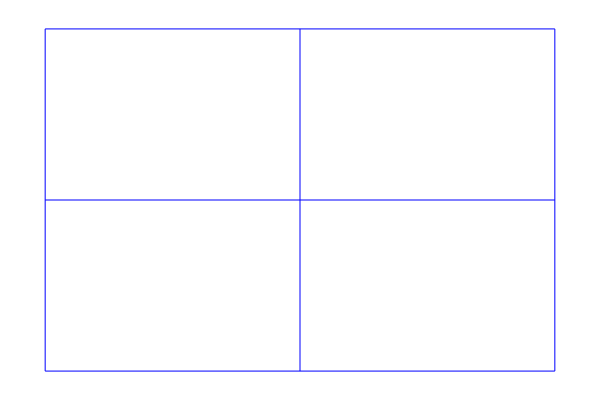

In [33]:
p = plot_graph(A1,x_g1,y_g1;dots=false);

In [34]:
A1+zeros(size(A1))

9×9 Array{Float64,2}:
 0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [35]:
A1

9×9 SparseMatrixCSC{Number,Integer} with 12 stored entries:
  [1, 2]  =  1
  [2, 3]  =  1
  [1, 4]  =  1
  [2, 5]  =  1
  [4, 5]  =  1
  [3, 6]  =  1
  [5, 6]  =  1
  [4, 7]  =  1
  [5, 8]  =  1
  [7, 8]  =  1
  [6, 9]  =  1
  [8, 9]  =  1

In [36]:
A1+A1'

9×9 SparseMatrixCSC{Any,Integer} with 24 stored entries:
  [2, 1]  =  1
  [4, 1]  =  1
  [1, 2]  =  1
  [3, 2]  =  1
  [5, 2]  =  1
  [2, 3]  =  1
  [6, 3]  =  1
  [1, 4]  =  1
  [5, 4]  =  1
  [7, 4]  =  1
  [2, 5]  =  1
  [4, 5]  =  1
  [6, 5]  =  1
  [8, 5]  =  1
  [3, 6]  =  1
  [5, 6]  =  1
  [9, 6]  =  1
  [4, 7]  =  1
  [8, 7]  =  1
  [5, 8]  =  1
  [7, 8]  =  1
  [9, 8]  =  1
  [6, 9]  =  1
  [8, 9]  =  1

note the type SparseMatrixCSC{Any,Integer}

seems like a bug?

why isn't Dan getting this?

NOW CHANGED THE TYPES:

In [44]:
ijv_g1 = grid2_ijv2(3,3)

Laplacians.IJV{Float64,Int64}(9, 12, [1, 1, 4, 4, 7, 2, 2, 5, 5, 8, 3, 6], [2, 4, 5, 7, 8, 3, 5, 6, 8, 9, 6, 9], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [46]:
A1 = sparse(ijv_g1)

9×9 SparseMatrixCSC{Float64,Int64} with 12 stored entries:
  [1, 2]  =  1.0
  [2, 3]  =  1.0
  [1, 4]  =  1.0
  [2, 5]  =  1.0
  [4, 5]  =  1.0
  [3, 6]  =  1.0
  [5, 6]  =  1.0
  [4, 7]  =  1.0
  [5, 8]  =  1.0
  [7, 8]  =  1.0
  [6, 9]  =  1.0
  [8, 9]  =  1.0

In [47]:
ijv_g2 = ring_graph(3)

3×3 SparseMatrixCSC{Float64,Int64} with 6 stored entries:
  [2, 1]  =  1.0
  [3, 1]  =  1.0
  [1, 2]  =  1.0
  [3, 2]  =  1.0
  [1, 3]  =  1.0
  [2, 3]  =  1.0

In [48]:
collect(1:3)

3-element Array{Int64,1}:
 1
 2
 3